Problem-2

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# The dataset is already split into 25,000 reviews for training and 25,000 for testing.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=15000)

# Let's see what the data looks like
print("--- Sample Review ---")
print(train_data[0])
print("\n--- Corresponding Label ---")
print(train_labels[0]) # 1 means positive

--- Sample Review ---
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

--- Corresponding Label ---
1

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# We will pad each sequence to a maximum length of 250 words.
maxlen = 250

x_train = pad_sequences(train_data, maxlen=maxlen)
x_test = pad_sequences(test_data, maxlen=maxlen)

# Let's check the new shape
print("Shape of training data after padding:", x_train.shape)
print("Shape of test data after padding:", x_test.shape)

# Also, let's convert our labels to a NumPy array for compatibility
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Shape of training data after padding: (25000, 250)
Shape of test data after padding: (25000, 250)


In [4]:
x_partial_train, x_val, y_partial_train, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=42)

print("Training samples:", len(x_partial_train))
print("Validation samples:", len(x_val))

Training samples: 18750
Validation samples: 6250


In [5]:
model = keras.Sequential()

# 1. The Embedding Layer
# This layer is a powerful tool for NLP. It takes the integer-encoded words (our input)
# and learns a dense vector representation (an "embedding") for each word.
# - 15000 is the vocabulary size (input dimension).
# - 64 is the size of the vector that will represent each word (output dimension).
model.add(layers.Embedding(15000, 64))

# We need to flatten the 3D output of the embedding layer to a 2D tensor
# so it can be fed into a standard Dense layer.
model.add(layers.Flatten())

# 2. The Hidden Layer
# A standard, fully-connected neural network layer with 64 units.
# - 'relu' (Rectified Linear Unit) is the activation function. It's a common and
#   effective choice that helps the network learn complex patterns.
model.add(layers.Dense(64, activation='relu'))

# 3. The Output Layer
# This final layer outputs the classification.
# - It has 1 unit because this is a binary classification (positive/negative).
# - 'sigmoid' activation squashes the output to a value between 0 and 1.
#   We can interpret this as the probability of the review being positive.
model.add(layers.Dense(1, activation='sigmoid'))

# Let's see a summary of our model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_partial_train,
                    y_partial_train,
                    epochs=15,
                    batch_size=512, # Process data in batches of 512 reviews
                    validation_data=(x_val, y_val),
                    verbose=1) # verbose=1 will show a progress bar

Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6488 - loss: 0.6250 - val_accuracy: 0.7926 - val_loss: 0.4408
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8862 - loss: 0.2798 - val_accuracy: 0.8555 - val_loss: 0.3164
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9718 - loss: 0.1118 - val_accuracy: 0.8685 - val_loss: 0.3023
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9937 - loss: 0.0412 - val_accuracy: 0.8667 - val_loss: 0.3224
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9986 - loss: 0.0166 - val_accuracy: 0.8574 - val_loss: 0.3532
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9994 - loss: 0.0093 - val_accuracy: 0.8624 - val_loss: 0.3590
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9999 - loss: 0.0045 - val_accuracy: 0.8622 - val_loss: 0.3773
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 0.8627 - v

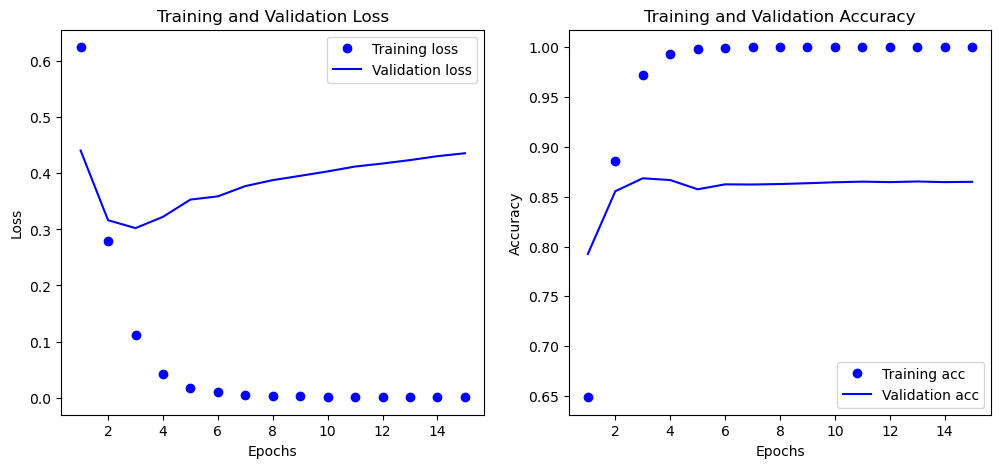

In [8]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # "b" is for "solid blue line"
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [9]:
results = model.evaluate(x_test, y_test, verbose=0)
print("\n--- Final Test Performance ---")
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")


--- Final Test Performance ---
Test Loss: 0.4484
Test Accuracy: 0.8642


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step


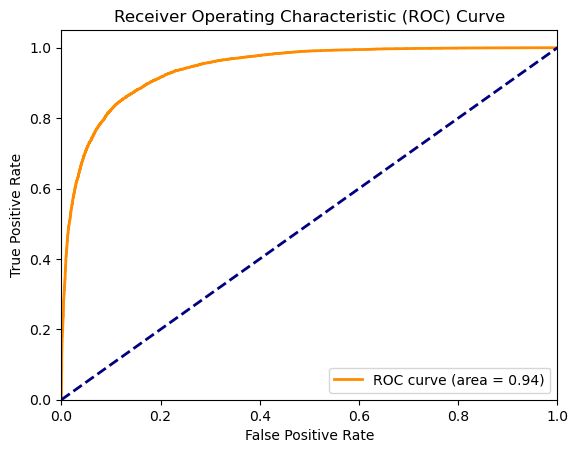

In [10]:
# Get prediction probabilities for the test set
y_pred_prob = model.predict(x_test).ravel()

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The "random guess" line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Problem-3

In [11]:
# We are reusing the x_train, y_train, x_test, y_test variables from Problem 2
# If you are starting a new notebook, make sure to run the data loading and padding steps first.

# The problem specifies a new 80% training / 20% validation split.
x_partial_train_deep, x_val_deep, y_partial_train_deep, y_val_deep = train_test_split(
    x_train, y_train, test_size=0.20, random_state=42) # test_size=0.20 for an 80/20 split

print("New training samples for deep model:", len(x_partial_train_deep))
print("New validation samples for deep model:", len(x_val_deep))

New training samples for deep model: 20000
New validation samples for deep model: 5000


In [12]:
# It's good practice to clear any previous models from memory
keras.backend.clear_session()

deep_model = keras.Sequential()
deep_model.add(layers.Embedding(15000, 64))

# We need to flatten the output of the Embedding layer before passing it to Dense layers
deep_model.add(layers.Flatten())

# Hidden Layer 1
deep_model.add(layers.Dense(256, activation='relu'))
deep_model.add(layers.Dropout(0.4)) # Dropout layer after the first hidden layer

# Hidden Layer 2
deep_model.add(layers.Dense(128, activation='relu'))
deep_model.add(layers.Dropout(0.4)) # Dropout layer after the second hidden layer

# Hidden Layer 3
deep_model.add(layers.Dense(64, activation='relu')) # No dropout after the last hidden layer

# Output Layer
deep_model.add(layers.Dense(1, activation='sigmoid'))

deep_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the new deep model
history_deep = deep_model.fit(x_partial_train_deep,
                              y_partial_train_deep,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val_deep, y_val_deep),
                              verbose=1)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5762 - loss: 0.6745 - val_accuracy: 0.7454 - val_loss: 0.5183
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8608 - loss: 0.3329 - val_accuracy: 0.8066 - val_loss: 0.5055
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9653 - loss: 0.1027 - val_accuracy: 0.8416 - val_loss: 0.5027
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9941 - loss: 0.0215 - val_accuracy: 0.8420 - val_loss: 0.7536
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.8372 - val_loss: 0.7906
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.8418 - val_loss: 0.9114
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9999 - loss: 4.3965e-04 - val_accuracy: 0.8402 - val_loss: 0.9585
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 1.9400e-04 - val_accuracy: 0.

In [14]:
# Evaluate the shallow model from Problem 2 (assuming it's named 'model')
results_shallow = model.evaluate(x_test, y_test, verbose=0)

# Evaluate our new deep model
results_deep = deep_model.evaluate(x_test, y_test, verbose=0)

print("--- Performance Comparison ---")
print(f"Shallow Model -> Test Loss: {results_shallow[0]:.4f}, Test Accuracy: {results_shallow[1]:.4f}")
print(f"Deep Model    -> Test Loss: {results_deep[0]:.4f}, Test Accuracy: {results_deep[1]:.4f}")

--- Performance Comparison ---
Shallow Model -> Test Loss: 0.4484, Test Accuracy: 0.8642
Deep Model    -> Test Loss: 1.2138, Test Accuracy: 0.8422


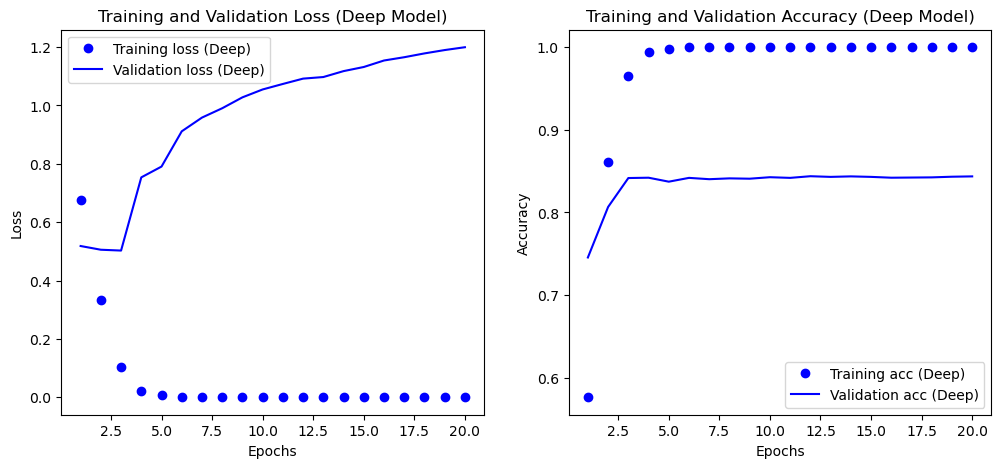

In [15]:
# You can reuse the plotting code from Problem 2, just pass it the new history_deep object
history_dict_deep = history_deep.history
acc_deep = history_dict_deep['accuracy']
val_acc_deep = history_dict_deep['val_accuracy']
loss_deep = history_dict_deep['loss']
val_loss_deep = history_dict_deep['val_loss']

epochs = range(1, len(acc_deep) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_deep, 'bo', label='Training loss (Deep)')
plt.plot(epochs, val_loss_deep, 'b', label='Validation loss (Deep)')
plt.title('Training and Validation Loss (Deep Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_deep, 'bo', label='Training acc (Deep)')
plt.plot(epochs, val_acc_deep, 'b', label='Validation acc (Deep)')
plt.title('Training and Validation Accuracy (Deep Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


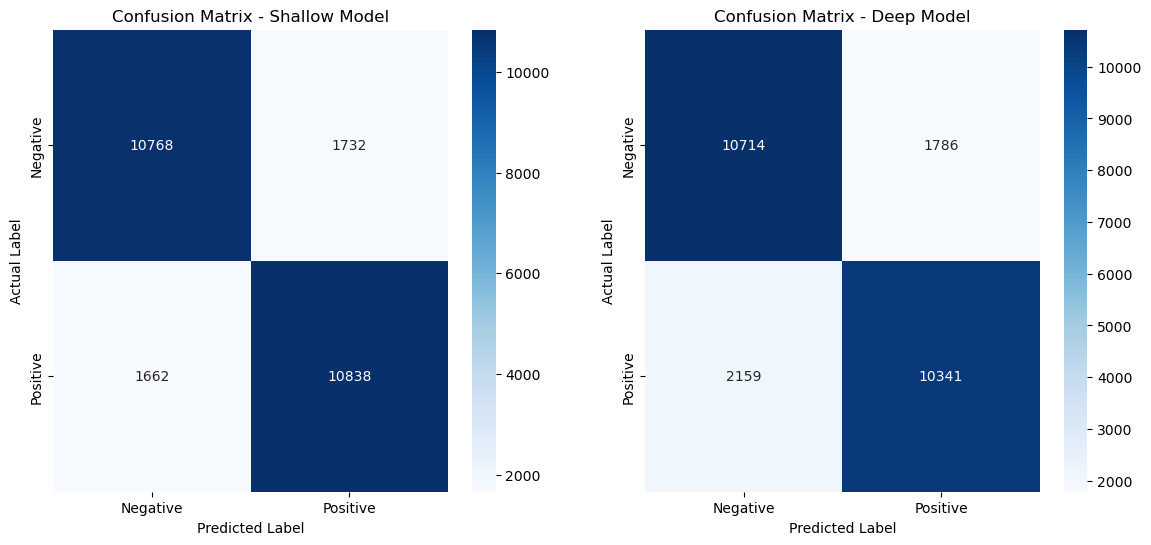

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the shallow model
# .predict() gives probabilities, so we round to get 0 or 1
preds_shallow = np.round(model.predict(x_test))

# Get predictions for the deep model
preds_deep = np.round(deep_model.predict(x_test))

# Calculate the confusion matrices
cm_shallow = confusion_matrix(y_test, preds_shallow)
cm_deep = confusion_matrix(y_test, preds_deep)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_shallow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Shallow Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_deep, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Deep Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.show()

### Problem 3: Final Analysis & Conclusion

After training and evaluating both models, the **Shallow Model from Problem 2 is demonstrably superior**.

A direct comparison reveals the following:

*   **Test Accuracy:** The **Shallow Model** achieved higher accuracy (**86.4%**) compared to the **Deep Model** (**84.5%**).
*   **Overfitting:** The **Deep Model** overfit much more severely and quickly, despite using Dropout. Its validation loss increased significantly after only two epochs.
*   **Efficiency:** The **Shallow Model** was more efficient, training faster due to its simpler architecture.

**Verdict:** For this task, the simpler architecture proved more effective. The added complexity of the deep model led to poorer generalization without providing any benefit to accuracy.

Problem-4

In [17]:
from tensorflow.keras.datasets import imdb
import numpy as np

# Load the data again just to be safe and start fresh for this problem
(train_data, _), (test_data, _) = imdb.load_data(num_words=15000) # We don't need the labels

def vectorize_sequences(sequences, dimension=15000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Vectorize our data
x_train_vec = vectorize_sequences(train_data)
x_test_vec = vectorize_sequences(test_data)

print("Shape of vectorized training data:", x_train_vec.shape)
print("Shape of vectorized test data:", x_test_vec.shape)

Shape of vectorized training data: (25000, 15000)
Shape of vectorized test data: (25000, 15000)


In [18]:
from tensorflow import keras
from tensorflow.keras import layers

# Clear previous models from memory
keras.backend.clear_session()

# --- Define the Autoencoder Model ---
autoencoder = keras.Sequential()

# Encoder Part
autoencoder.add(layers.Input(shape=(15000,)))
autoencoder.add(layers.Dense(128, activation='relu'))
autoencoder.add(layers.Dense(64, activation='relu')) # This is the compressed "bottleneck" layer

# Decoder Part
autoencoder.add(layers.Dense(128, activation='relu'))
autoencoder.add(layers.Dense(15000, activation='sigmoid')) # Output layer

# --- Compile the Model ---
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,920,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15000)          │     1,935,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,871,704 (14.77 MB)

 Trainable params: 3,871,704 (14.77 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history_autoencoder = autoencoder.fit(x_train_vec, x_train_vec, # Note: input and target are the same
                                      epochs=30,
                                      batch_size=64,
                                      validation_split=0.2, # Use 20% of training data for validation
                                      verbose=1)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0681 - val_loss: 0.0329
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0321 - val_loss: 0.0323
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0316 - val_loss: 0.0320
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0313 - val_loss: 0.0317
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0310 - val_loss: 0.0315
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0307 - val_loss: 0.0312
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0303 - val_loss: 0.0309
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0300 - val_loss: 0.0306
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0297 - val_loss: 0.0304
Epoch 10/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0294 - val_loss: 0.0302
Epoch 11/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0291 - val_loss: 0.0300
Epoch 12/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 

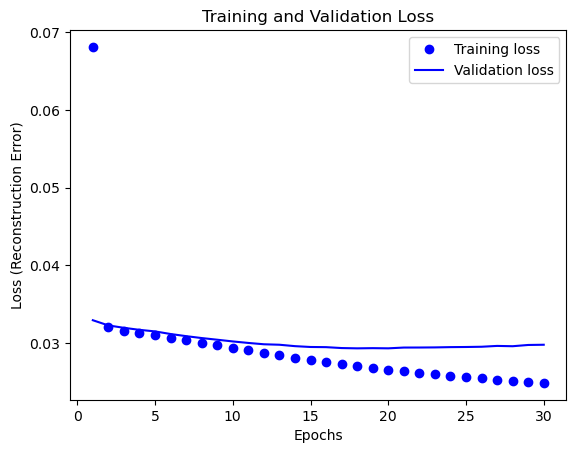

In [20]:
import matplotlib.pyplot as plt

history_dict = history_autoencoder.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Reconstruction Error)')
plt.legend()
plt.show()

In [21]:
reconstruction_error = autoencoder.evaluate(x_test_vec, x_test_vec)
print(f"\nFinal Reconstruction Error on Test Set: {reconstruction_error:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0291

Final Reconstruction Error on Test Set: 0.0291


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the model's reconstructions of the test set
reconstructed_vectors = autoencoder.predict(x_test_vec)

# Let's check the similarity for the first 5 reviews in the test set
for i in range(5):
    # The vectors need to be reshaped to be 2D for the function
    original_vector = x_test_vec[i].reshape(1, -1)
    reconstructed_vector = reconstructed_vectors[i].reshape(1, -1)

    similarity = cosine_similarity(original_vector, reconstructed_vector)
    print(f"Cosine Similarity for test review #{i}: {similarity[0][0]:.4f}")

# You can also calculate the average similarity over the whole test set
# Note: This can be slow for all 25,000 samples
avg_similarity = 0
num_samples = 1000 # Let's average over the first 1000 samples for speed
for i in range(num_samples):
    original_vector = x_test_vec[i].reshape(1, -1)
    reconstructed_vector = reconstructed_vectors[i].reshape(1, -1)
    avg_similarity += cosine_similarity(original_vector, reconstructed_vector)[0][0]

print(f"\nAverage Cosine Similarity over first {num_samples} samples: {avg_similarity/num_samples:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Cosine Similarity for test review #0: 0.5995
Cosine Similarity for test review #1: 0.5326
Cosine Similarity for test review #2: 0.4643
Cosine Similarity for test review #3: 0.5587
Cosine Similarity for test review #4: 0.5324

Average Cosine Similarity over first 1000 samples: 0.5405
